In [185]:
import pandas as pd
import matplotlib.pyplot as plt

In [186]:
#Read data for every Borough
df_manhattan = pd.read_excel('RollingSalesData/rollingsales_manhattan.xls', header=4, usecols=[0, 1, 2, 3, 7, 10, 15, 16, 18, 19, 20])
df_bronx = pd.read_excel('RollingSalesData/rollingsales_bronx.xls', header=4, usecols=[0, 1, 2, 3, 7, 10, 15, 16, 18, 19, 20])
df_brooklyn = pd.read_excel('RollingSalesData/rollingsales_brooklyn.xls', header=4, usecols=[0, 1, 2, 3, 7, 10, 15, 16, 18, 19, 20])
df_queens = pd.read_excel('RollingSalesData/rollingsales_queens.xls', header=4, usecols=[0, 1, 2, 3, 7, 10, 15, 16, 18, 19, 20])
df_statenisland = pd.read_excel('RollingSalesData/rollingsales_statenisland.xls', header=4, usecols=[0, 1, 2, 3, 7, 10, 15, 16, 18, 19, 20])

In [187]:
#Concatenate the data for all boroughs
df_combined = pd.concat([df_manhattan, df_bronx, df_brooklyn,  df_queens, df_statenisland])

#Replace the 'BOROUGH' with appropriate depictions for each borough: M -1 , X - 2, B - 3, Q - 4, S - 5
df_combined['BOROUGH'].replace({1:'M', 2:'X', 3:'B', 4:'Q', 5:'S'}, inplace=True)

In [188]:
#Number of rows with a sale price of $0
(df_combined['SALE PRICE'] == 0).value_counts()

False    58787
True     24707
Name: SALE PRICE, dtype: int64

In [189]:
#Remove the records with a sale price of 0
df_combined = df_combined[df_combined['SALE PRICE'] != 0]

In [190]:
#Number of rows where Area of the property solde is missing
(df_combined['GROSS SQUARE FEET'] == 0).value_counts()

False    29566
True     29221
Name: GROSS SQUARE FEET, dtype: int64

In [191]:
#Check for missing data in other columns
#Borough
(df_combined['BOROUGH'] == "").value_counts()

False    58787
Name: BOROUGH, dtype: int64

In [192]:
#Neighborhood
(df_combined['NEIGHBORHOOD'] == " ").value_counts()

False    58787
Name: NEIGHBORHOOD, dtype: int64

In [193]:
#Building Class Category
(df_combined['BUILDING CLASS CATEGORY'] == "").value_counts()

False    58787
Name: BUILDING CLASS CATEGORY, dtype: int64

In [194]:
#Building Class at Present
(df_combined['BUILDING CLASS AT PRESENT'] == "").value_counts()

False    58787
Name: BUILDING CLASS AT PRESENT, dtype: int64

In [195]:
#Zip Code
(df_combined['ZIP CODE'] == 0).value_counts()

False    58488
True       299
Name: ZIP CODE, dtype: int64

In [196]:
df_group = df_combined.groupby(['NEIGHBORHOOD', 'ZIP CODE']).count()['SALE PRICE'].reset_index()

idx = df_group.groupby(['NEIGHBORHOOD'])['SALE PRICE'].transform(max) == df_group['SALE PRICE']
df_key = df_group[idx][['NEIGHBORHOOD', 'ZIP CODE']]
df_key.set_index('NEIGHBORHOOD', inplace=True)
#Create a dictionary
dictmap = df_key.to_dict()['ZIP CODE']
#Map Neighborhood to Zip Code 
df_combined['ZIP CODE'] = df_combined['NEIGHBORHOOD'].map(dictmap)

(df_combined['ZIP CODE'] == 0).value_counts()

False    58787
Name: ZIP CODE, dtype: int64

In [197]:
#Year Built
(df_combined['YEAR BUILT'] == 0).value_counts()

False    55089
True      3698
Name: YEAR BUILT, dtype: int64

In [198]:
df_combined = df_combined[df_combined['YEAR BUILT'] != 0]

In [199]:
#Building Class at Time of Sale
(df_combined['BUILDING CLASS AT TIME OF SALE'] == 0).value_counts()

False    55089
Name: BUILDING CLASS AT TIME OF SALE, dtype: int64

In [200]:
#Sale Date
(df_combined['SALE DATE'] == 0).value_counts()

False    55089
Name: SALE DATE, dtype: int64

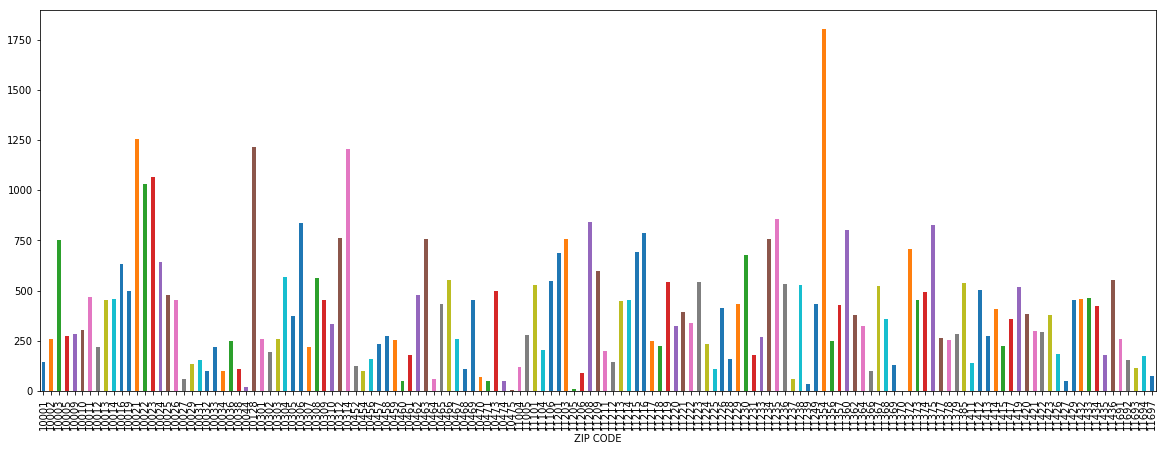

In [201]:
#bar graph of number of apartments sold by Zip Code
numbins = df_combined['ZIP CODE'].drop_duplicates().count()
(df_combined.groupby(['ZIP CODE']).count()['SALE PRICE']).plot.bar()

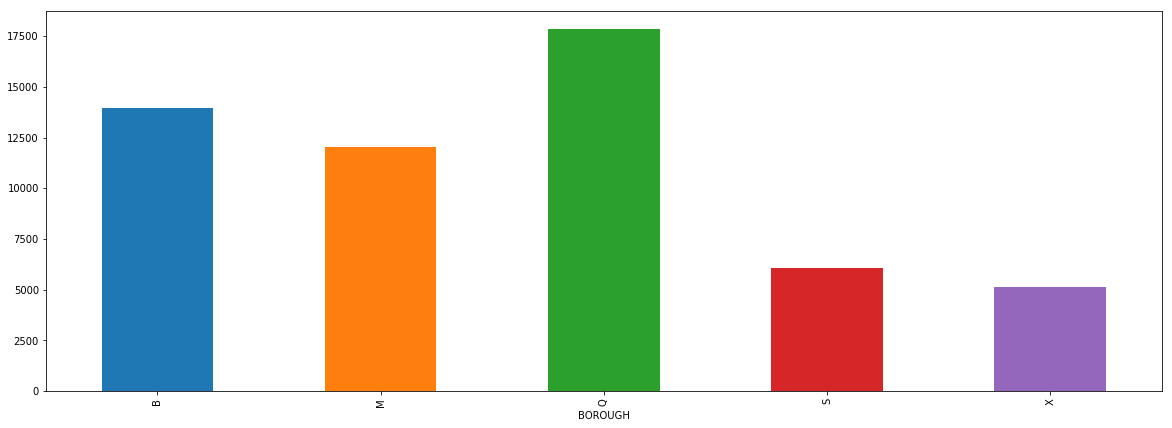

In [202]:
#Bar Graph of number of apartments sold in each borough
borough_data = df_combined.groupby(['BOROUGH']).count()['SALE PRICE']
borough_data.plot.bar()

<BarContainer object of 159 artists>

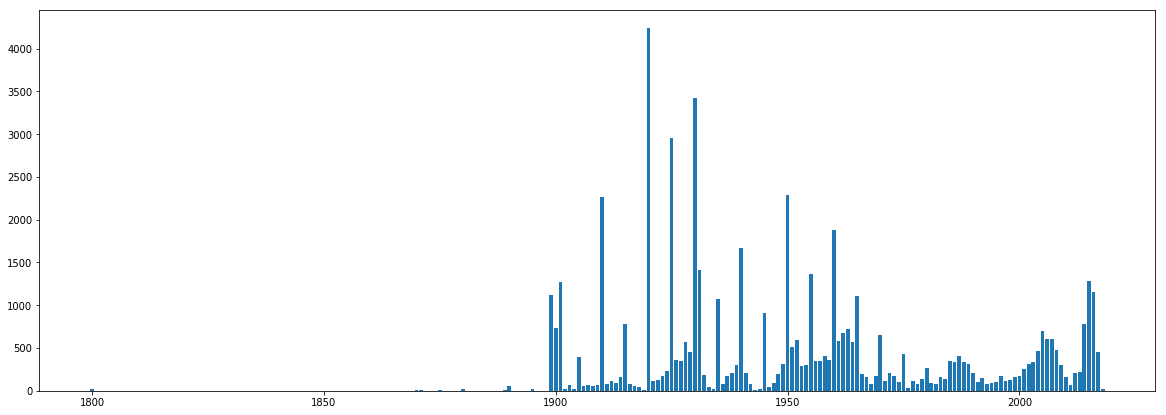

In [203]:
#Bar Graph of number of apartents by Year Built
year_data = df_combined.groupby(['YEAR BUILT']).count()['SALE PRICE']
plt.bar(year_data.index, year_data)

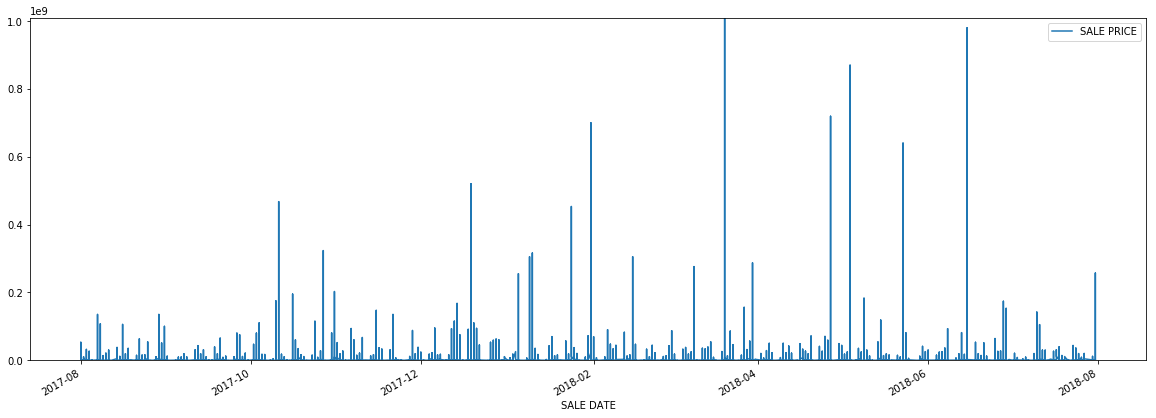

In [260]:
#Line plot of Sales Price and the Date 
saleprice_data = df_combined[['SALE PRICE', 'SALE DATE']]
saleprice_data.plot.line(x='SALE DATE', y='SALE PRICE', ylim=(0, 1.01e9))

In [261]:
saleprice_data.set_index('SALE DATE', inplace=True)

#saleprice_data['SALE DATE'] = pd.to_datetime(saleprice_data['SALE DATE'], format='%y-%b-%d')

saleprice_grouped = saleprice_data.groupby(pd.Grouper(freq='M'))


In [263]:
print(saleprice_grouped)